# Numerical Computing :: Project Eight

### Julia Troni

In [1]:
%matplotlib notebook
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import math


---
---
---


### 1. Method of Normal Equations (uses the Cholesky factorization)


In [2]:
#3.Solve with Cholesky factorization
def choleskySolve(A, b):
    new_A = np.matmul(A.T, A)
    new_b = np.matmul(A.T, b)
    L = np.linalg.cholesky(new_A)
    y = np.linalg.solve(L, new_b)
    return np.linalg.solve(L.T, y)

def NormEqChol(A, b):
    if np.linalg.matrix_rank(A) == A.shape[1]:
        return choleskySolve(A,b)
    else:
        print("Rank ({}) must be equal to number of columns ({})".format(1,2))
        return None
    

### 2. Method based on the Thin QR factorization

In [3]:
#Thin QR 
def ThinQR(A, b):
    Q, R = np.linalg.qr(A)
    return np.linalg.solve(R, Q.T.dot(b))


- Next, load the given matrix (download from Canvas) into memory. Call the matrix A, 

    A =[a1 · · · an] (1) 

        where ai ∈ R m is the ith column of A. Define the matrices A1, . . . , An as: 

    Ak = [a1 · · · ak ], k = 1, . . . , n. (2) 

        That is, Ak contains the first k columns of the matrix A (that you loaded into memory). 

In [4]:
#load matrix
mat8= np.loadtxt('Project 8 Matrix.txt',dtype=float, encoding=None, delimiter=",")

### 1. Report the size, rank, and condition number of Ak.

In [5]:
def MatrixEvaluation(mat):
    #1. What are the matrix dimensions?
    size=mat.shape
    
    # What is the rank?
    rank= np.linalg.matrix_rank(mat)
    
    #  What is the condition number?
    cond= np.linalg.cond(mat)
    
    return print("Size: {},   Rank: {},   Condition Number: {}".format(size,rank,cond))

### 2. Analyze Error Data
- Now, generate the error data that you’ll analyze. For k from kmin = 40 to kmax = 65:
- Generate 100 random vectors bi ∈ Rm.
- For each bi:
    - (a) Use the built-in equation solver (numpy.linalg.lstsq) to compute the least-squares minimizers given Ak and bi. Call this vectorxtrue, because we’re just gonna trust the software on this one.
    - (b) Use your Normal Equation solver to compute the least-squares minimizer, xNE. Compute the relative error with xtrue.
    - (c) Use your QR solver to compute the least-squares minimizer, xQR. Compute the relative error with xtrue.

In [6]:
#adapted from proj5
def generate_random_bs(mat, num_bs):
    ret = []
    for i in range(num_bs):
        ret.append(np.random.rand(mat.shape[0],1))
    return ret

#from proj5
def relative_error(sol, truth):
    return np.linalg.norm(sol - truth) / np.linalg.norm(sol)

In [7]:
low = 40
high = 65
avg_NE_errors = []
avg_QR_errors = []

for k in range(low, high + 1):
    # 1: Report size, rank, and condition number for each matrix A_k
    A_k = np.delete(mat8, [x for x in range(k, mat8.shape[0])], 1)
    MatrixEvaluation(A_k)
    #Call this vectorxtrue
    
     # 2 Generate 100 random vectors b_i. For each b_i:    
    b_is = generate_random_bs(A_k, 100)
    
    # vector xtrue, because we’re just gonna trust the software on this one.
    xtrue = []
    
    #hold each bs error for each method
    xNE = []
    xQR = []
    
    i = 0
    
    for b_i in b_is:
        # Use the built-in equation solver (numpy.linalg.lstsq) to compute the least-squares minimizers given Ak and bi. 
        xtrue.append(np.linalg.lstsq(A_k, b_i, rcond=None)[0])

        # use Normal Equation method that uses Cholesky Solving
        #and compute relative error
        xNE.append(relative_error(NormEqChol(A_k, b_i), xtrue[i]))

        # use Thin QR factorization
        #and compute relative error
        xQR.append(relative_error(ThinQR(A_k, b_i), xtrue[i]))
        
        i+=1
        
    avg_NE_errors.append(np.mean(xNE))
    avg_QR_errors.append(np.mean(xQR))

Size: (101, 40),   Rank: 40,   Condition Number: 74.87666090810829
Size: (101, 41),   Rank: 41,   Condition Number: 103.80036453828598
Size: (101, 42),   Rank: 42,   Condition Number: 152.28560787895992
Size: (101, 43),   Rank: 43,   Condition Number: 217.5603797633556
Size: (101, 44),   Rank: 44,   Condition Number: 328.8920284188398
Size: (101, 45),   Rank: 45,   Condition Number: 483.7805289853143
Size: (101, 46),   Rank: 46,   Condition Number: 753.0464969101489
Size: (101, 47),   Rank: 47,   Condition Number: 1140.0742240740228
Size: (101, 48),   Rank: 48,   Condition Number: 1826.7931127930933
Size: (101, 49),   Rank: 49,   Condition Number: 2846.4222743668856
Size: (101, 50),   Rank: 50,   Condition Number: 4695.087418605814
Size: (101, 51),   Rank: 51,   Condition Number: 7530.548252626719
Size: (101, 52),   Rank: 52,   Condition Number: 12789.3765489398
Size: (101, 53),   Rank: 53,   Condition Number: 21122.71687383797
Size: (101, 54),   Rank: 54,   Condition Number: 36949.483

### Make two plots on a semilogy scale:
- 1) the average error versus k (how many columns in the matrix) for both QR and the Normal Equations


<IPython.core.display.Javascript object>


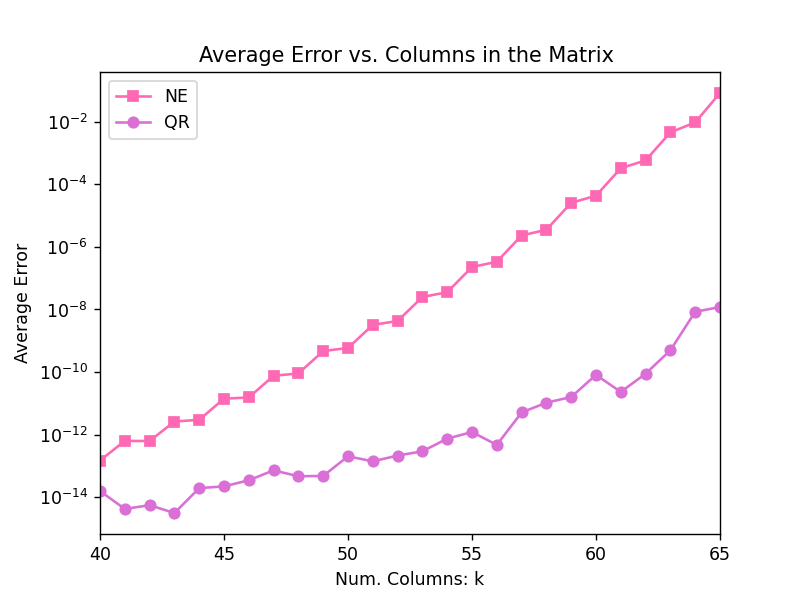

In [8]:
#for columns
k = [n for n in range(low, high + 1)]

#semilog plot with mathlab
plt.semilogy(k, avg_NE_errors, '-s', label='NE', color='hotpink')
plt.semilogy(k, avg_QR_errors, '-o', label='QR', color= 'orchid')
plt.xlim([low, high])

#label 
plt.title("Average Error vs. Columns in the Matrix ")
plt.xlabel("Num. Columns: k")
plt.ylabel("Average Error")
plt.legend()
plt.show()

---
---
---
---

 # Now tell me what’s going on. More specifically:
1. What is the relationship between the error using QR versus the Normal Equations?
        -QR error is lower on average than the method of Normal Equations. This is because in NE method when we are forming the product, we square the condition number of the problem matrix which causes instability.
    
2. What is the relationship between the errors and the condition number of Ak?
        - As condition number increases, the error also increases
    
3. Suppose your matrix A is ill-conditioned. Which method is more faorable?
        - If the matrix is ill-conditioned it can reduce the accuracy of a least squares solution.
        - The the method of using normal equations using Cholesky (NormEqChol) is likely to be unstable, especially for large problems. In general it is not recommended in general. 
        - QR factorization is more stable than the Cholesky approach so it is the standard method for least squares problems.

## References

- Paul's famous lectures, as always
- used many helper functions from my Project 4 and 5
- http://www.math.iit.edu/~fass/477577_Chapter_5.pdf
- https://pythontic.com/visualization/charts/semilog
- https://johnwlambert.github.io/least-squares/
- http://www.ece.northwestern.edu/local-apps/matlabhelp/techdoc/ref/qr.html
- https://www.quantstart.com/articles/QR-Decomposition-with-Python-and-NumPy/
- https://boostedml.com/2020/04/solving-full-rank-linear-least-squares-without-matrix-inversion-in-python-and-numpy.html